# Sommaire

In [ ]:
from google.colab import files
files.upload()

In [ ]:
pip install lazypredict

# <a id='1'>0. Imporatation des données </a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
import scipy.stats as st
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from random import randint 
import pandas_profiling as pp 
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import lazypredict 
from lazypredict.Supervised import LazyClassifier
from sklearn.feature_selection import SelectKBest, f_classif
import pandas_profiling as pp 
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import precision_score,recall_score,cohen_kappa_score
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import plot_confusion_matrix

In [ ]:
data = pd.read_excel("Telco_customer_churn.csv.xlsx")

# <a id='2'>1. Exploration des données </a>

In [ ]:
profile = pp.ProfileReport(data,explorative=True)
profile

TypeError: ignored

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Count,7043.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
Zip Code,7043.00,93521.96,1865.79,90001.00,92102.00,93552.00,95351.00,96161.00
Latitude,7043.00,36.28,2.46,32.56,34.03,36.39,38.22,41.96
Longitude,7043.00,-119.80,2.16,-124.30,-121.82,-119.73,-118.04,-114.19
Tenure Months,7043.00,32.37,24.56,0.00,9.00,29.00,55.00,72.00
Monthly Charges,7043.00,64.76,30.09,18.25,35.50,70.35,89.85,118.75
Churn Value,7043.00,0.27,0.44,0.00,0.00,0.00,1.00,1.00
Churn Score,7043.00,58.70,21.53,5.00,40.00,61.00,75.00,100.00
CLTV,7043.00,4400.30,1183.06,2003.00,3469.00,4527.00,5380.50,6500.00


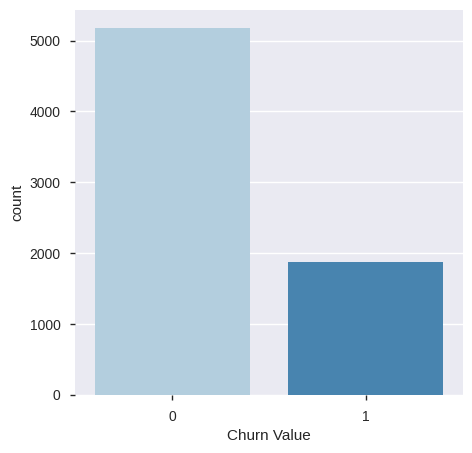

In [ ]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x=data["Churn Value"], palette="Blues", linewidth=1)
plt.show()

On remarque que le jeu de données est déséquilibré.

## <a id='1.1'>1.1. Les variables catégoriques</a>

In [ ]:
def barplot_percentages(feature, orient='v', axis_name="percentage of customers"):
    ratios = pd.DataFrame()
    g = data.groupby(feature)["Churn Value"].value_counts().to_frame()
    g = g.rename({"Churn Value": axis_name}, axis=1).reset_index()
    g[axis_name] = g[axis_name]/len(data)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn Value', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn Value', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()


In [ ]:
def fig_churn_by_feature(feature, data):
    gp_partner = data.groupby(feature)["Churn Value"].value_counts()/len(data)
    gp_partner = gp_partner.to_frame().rename({"Churn Value": axis_y},axis=1).reset_index()
    return gp_partner

### situation du client

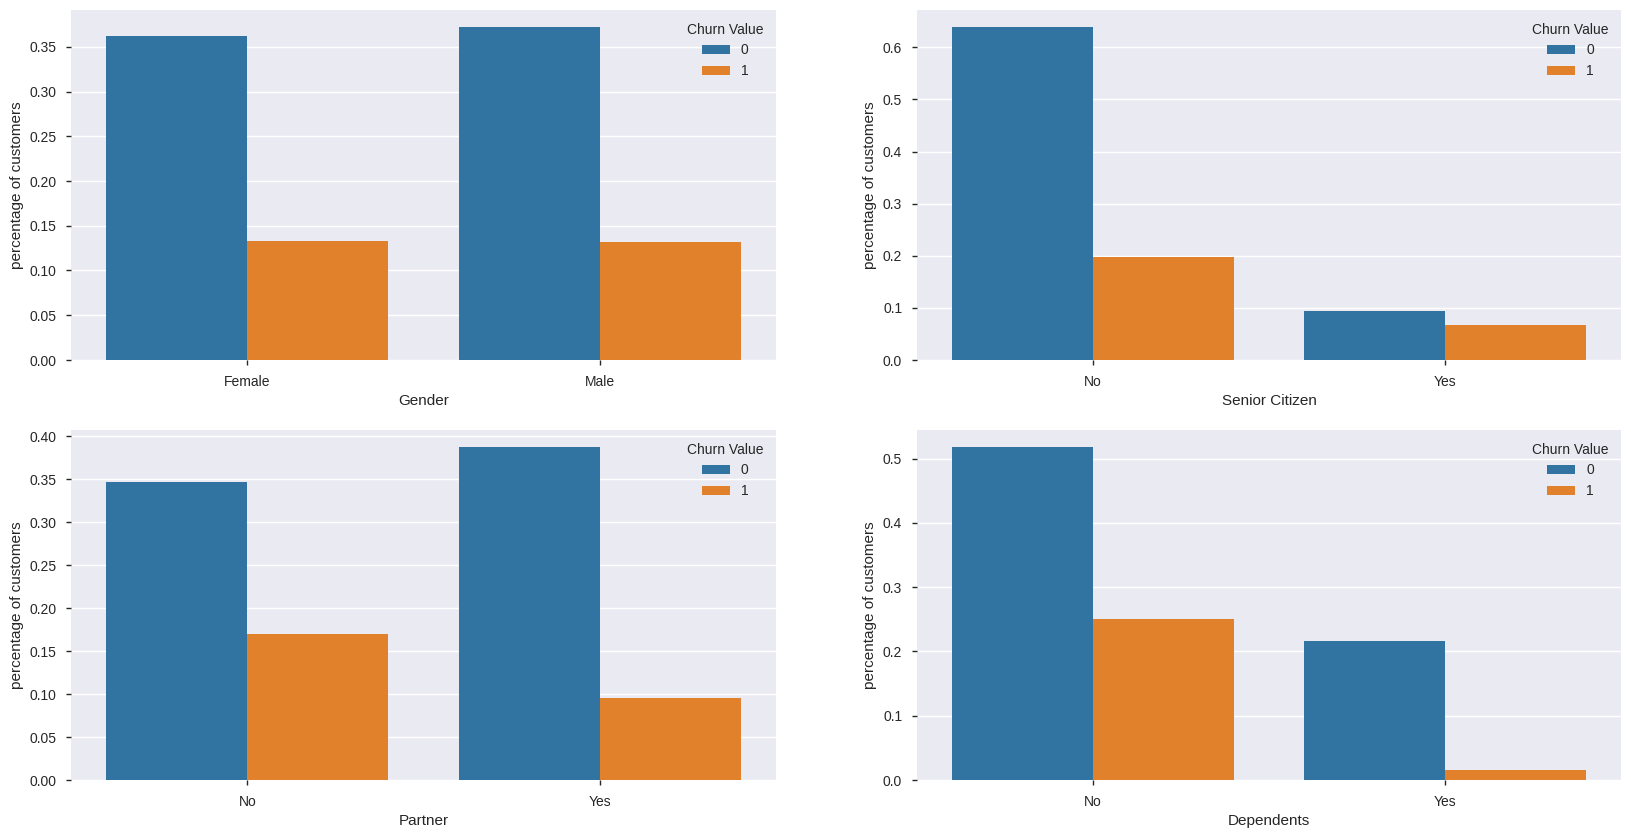

In [ ]:
fig, axis = plt.subplots(2, 2, figsize=(20,10), squeeze=False)
axis_y = "percentage of customers"

# Plot Partner column
ax = sns.barplot(x='Gender', y= axis_y, hue='Churn Value', data=fig_churn_by_feature('Gender',data), ax=axis[0][0])

# Plot Dependents column
ax = sns.barplot(x='Senior Citizen', y= axis_y, hue='Churn Value', data=fig_churn_by_feature('Senior Citizen',data), ax=axis[0][1])

# Plot Partner column
ax = sns.barplot(x='Partner', y= axis_y, hue='Churn Value', data=fig_churn_by_feature('Partner',data), ax=axis[1][0])

# Plot Dependents column
ax = sns.barplot(x='Dependents', y= axis_y, hue='Churn Value', data=fig_churn_by_feature('Dependents',data), ax=axis[1][1])

On remarque que le taux de désabonnement des clients est le même chez les hommes ainsi que les femmes qui est à l'ordre de 13%  
Donc on peut déduire que le sexe du client ne donne aucune indication.

Les personnes âgées constituent seulement 15-20% des clients, mais 40% d'eux ont tendance à se désabonner.

Les clients, qui ont un partenaire ou des dépendants, ont un taux de désabonnement moins faible par rapport à ceux qui n'ont pas de dépendants ou de partenaire.

### Service Mobile

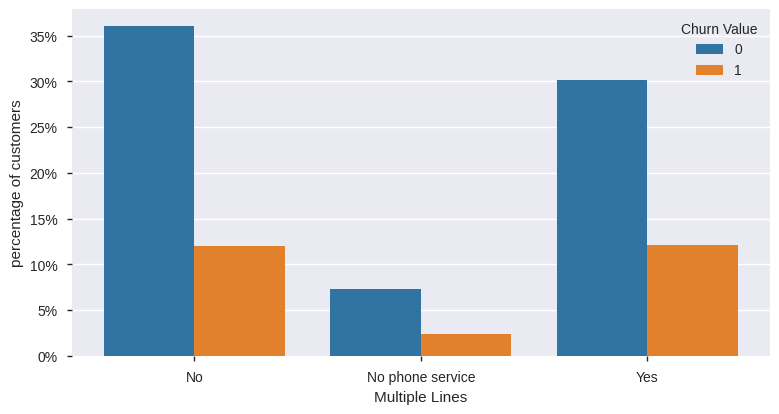

In [ ]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("Multiple Lines", orient='v')

Les clients qui ont plusieurs lignes ont une meilleur chance à se désabonner par rapport à ceux qui ont une seule ligne, ou ceux qui n'ont pas de lignes.

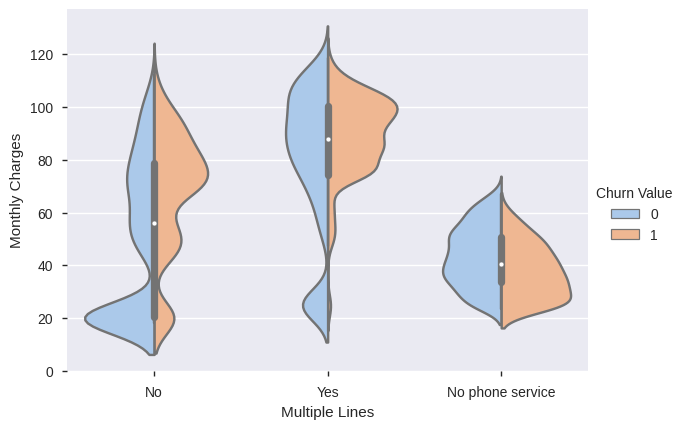

In [ ]:
ax = sns.catplot(x="Multiple Lines", y="Monthly Charges", hue="Churn Value", kind="violin",
                 split=True, palette="pastel", data=data, height=4.2, aspect=1.4);

On remarque que les dépenses mensuelles sont généralement +70$ pour ceux qui ont plusieurs lignes, ce qui explique cette tendance de désabonnement.

### Service Internet

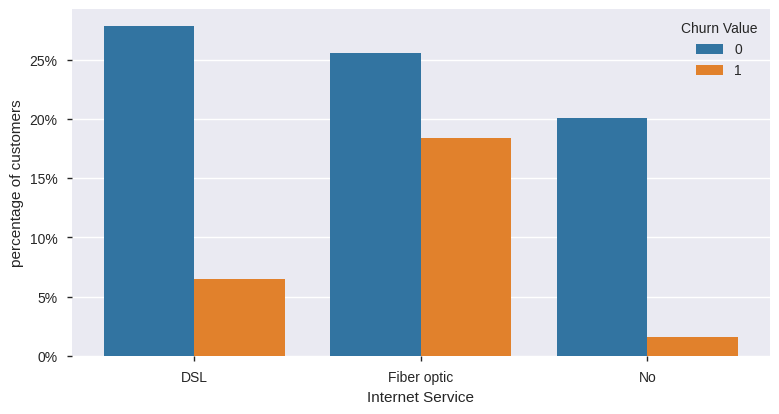

In [ ]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("Internet Service", orient="v")

Les clients qui ont la fibre optique ont une meilleur chance à se désabonner par rapport à ceux qui ont une le DSL, ou ceux qui n'ont pas de connexion.

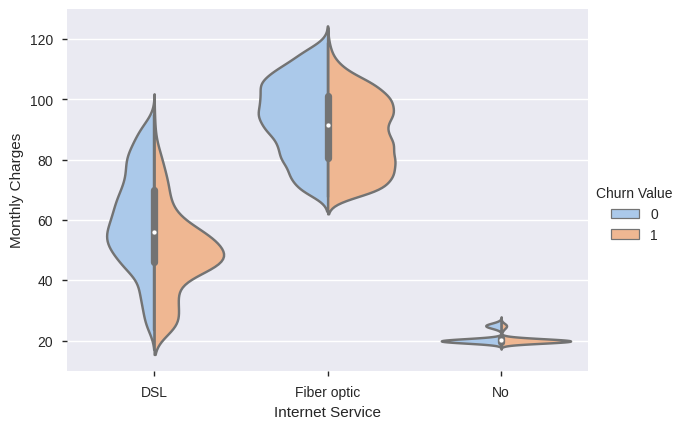

In [ ]:
ax = sns.catplot(x="Internet Service", y="Monthly Charges", hue="Churn Value", kind="violin",
                 split=True, palette="pastel", data=data, height=4.2, aspect=1.4)

On remarque que les dépenses mensuelles sont généralement +70$ pour ceux qui ont plusieurs lignes, ce qui explique cette tendance de désabonnement.

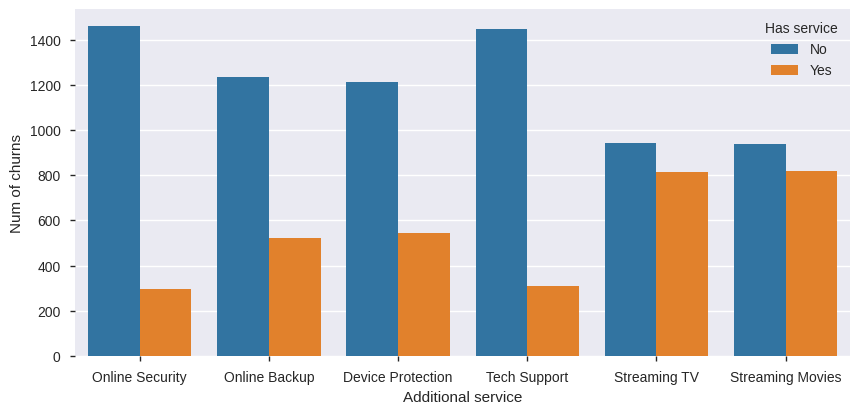

In [ ]:
services_cols = ["Online Security", "Online Backup", "Device Protection", "Tech Support", "Streaming TV", "Streaming Movies"]
plt.figure(figsize=(10, 4.5))
services_data = data[(data["Internet Service"] != "No") & (data["Churn Value"] == 1)]
services_data = pd.melt(services_data[services_cols]).rename({'value': 'Has service'}, axis=1)
ax = sns.countplot(data=services_data, x='variable', hue='Has service', hue_order=['No', 'Yes'])
ax.set(xlabel='Additional service', ylabel='Num of churns')
plt.show()

Les taux d'abonnement et de désabonnement est presque le même pour les variables de Streaming TV et Streaming Movies, donc on peut dire que ces variables ne sont pas indicatives.

### Contrat et Payement

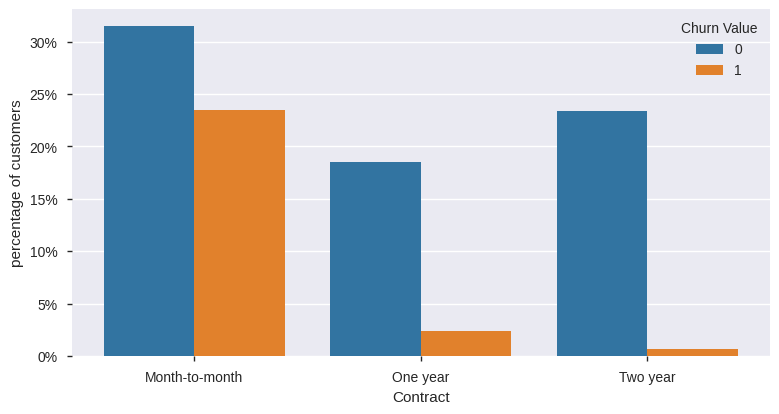

In [ ]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("Contract", orient="v")

On remarque que plus la durée du contrat est longue, plus le client est fidèle.

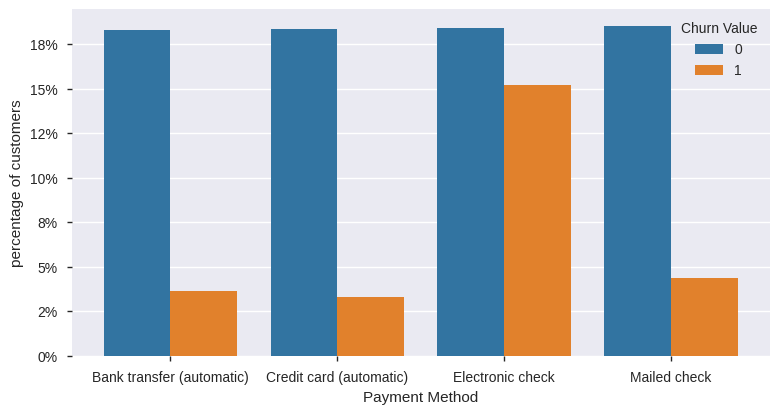

In [ ]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("Payment Method", orient="v")

Les clients qui utilisent le chèque électronique ont tendance de désabonner de la firme.

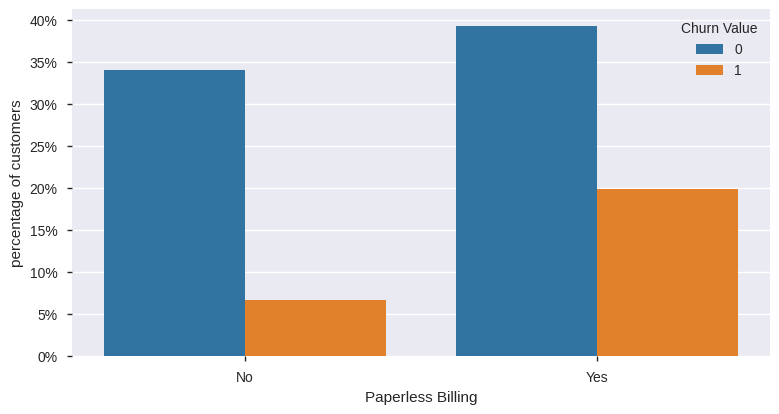

In [ ]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("Paperless Billing", orient="v")

Ceux qui préfèrent la facturation sans papier ont tendance de désabonner.

## <a id='1.2'>1.2. Les variables numériques</a>

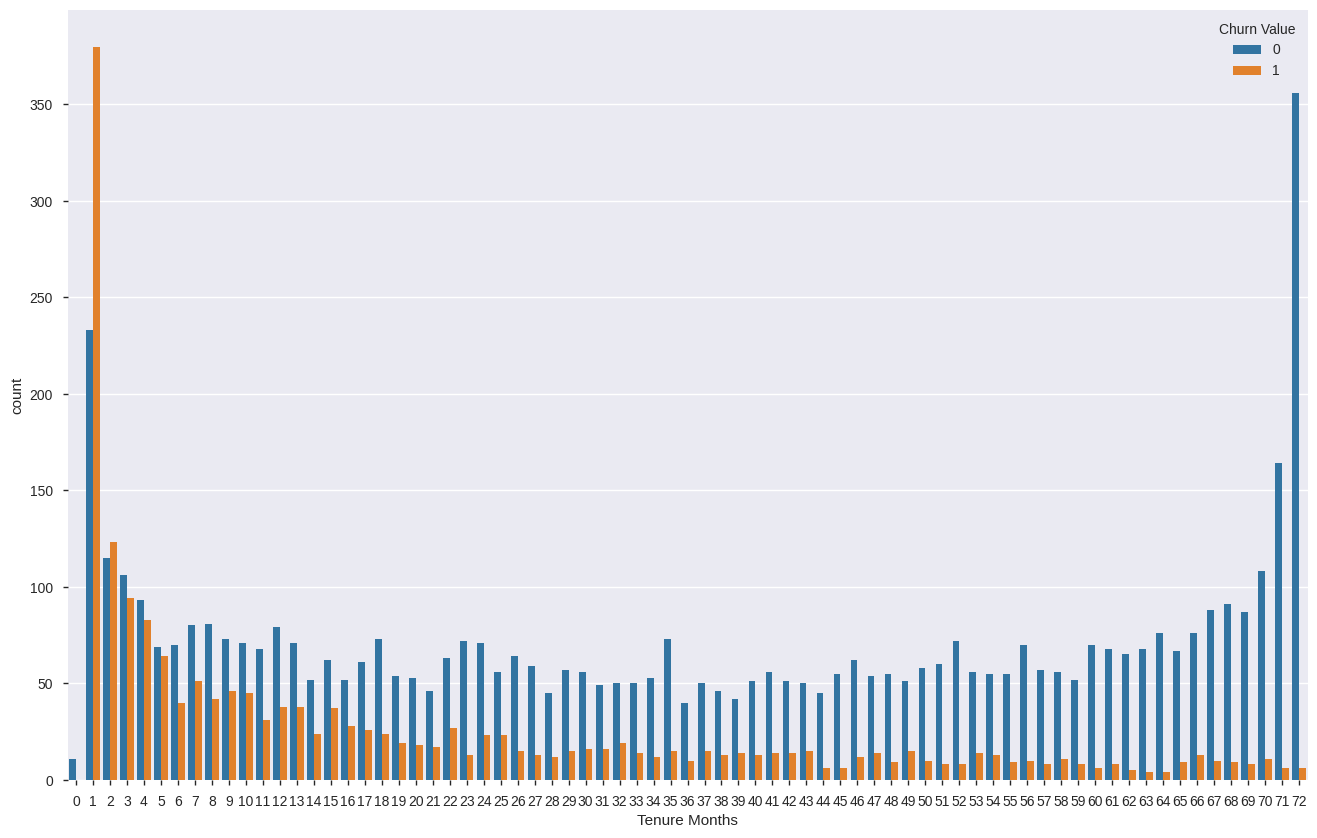

In [ ]:
plt.figure(figsize=(16,10))
ax = sns.countplot(x="Tenure Months", hue="Churn Value", data=data)
plt.show()

On remarque que plus la valeur de Tenure est grande plus le client est fidèle.

### CORRELATION

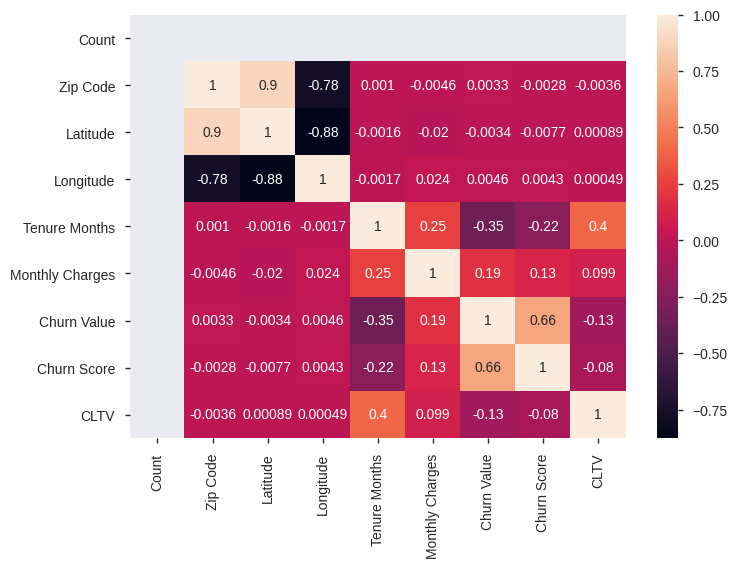

In [ ]:
correlation_mat = data.corr()

sns.heatmap(correlation_mat, annot = True)

plt.show()



# <a id='4'>2. Préparation des données</a>

In [ ]:
y=data['Churn Value']
X=data.drop(['Churn Value'], axis=1)

## <a id='4'>2.1 Nettoyage des données </a>

On remarque que certaines valeurs de Total Charges sont vides, donc on retires ces lignes, et puis on convertit cette colonne en float.

In [ ]:
rows_to_delete = [i for i in X.index if X['Total Charges'][i]==" "]
X.drop(rows_to_delete, inplace=True)
y.drop(rows_to_delete, inplace=True)

In [ ]:
X['Total Charges'] = pd.to_numeric(X['Total Charges'], downcast="float")

On doit retirer aussi les colonnes inutiles comme le CustomerID.

In [ ]:
X.drop(['CustomerID','Count','Country','State','Churn Reason'
,'Churn Score', 'Churn Label', 'CLTV','City','Lat Long',
'Zip Code', 'Latitude', 'Longitude'], axis=1, inplace=True)

KeyError: ignored

Comme on a vu dans la visualisation des données que les variables Gender, Streaming TV et Streaming Movies ne sont pas indicatives sur le status de désabonnement du client, donc on peut les retirer aussi.

In [ ]:
X.drop(['Gender','Streaming TV','Streaming Movies'], axis=1, inplace=True)

### Recherche des valeurs aberrantes

In [ ]:
num_cols = [col for col in X.columns if X[col].dtype != "object"]
num_cols

['Tenure Months', 'Monthly Charges', 'Total Charges']

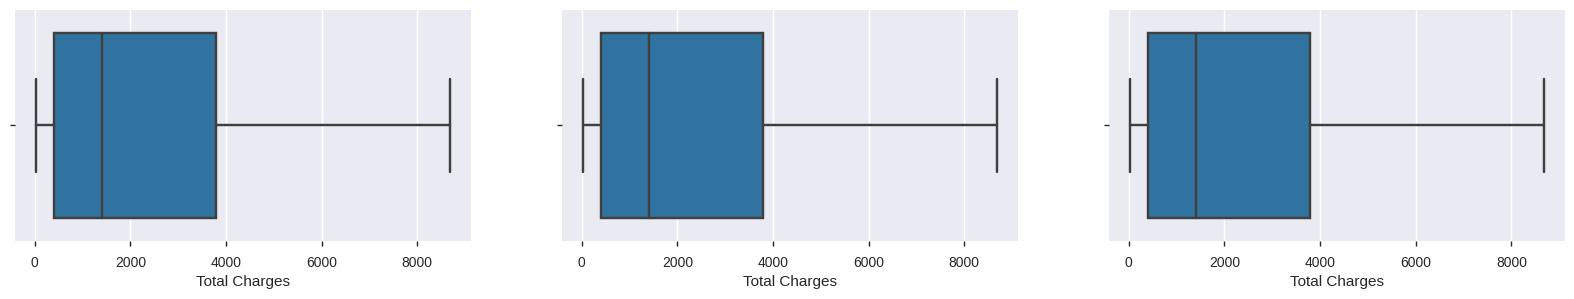

In [ ]:
fig, axis = plt.subplots(1, 3, figsize=(20,3), squeeze=False)
axis_y = "percentage of customers"

# Plot Partner column
ax = sns.boxplot(x=X['Total Charges'], ax=axis[0][0])

# Plot Dependents column
ax = sns.boxplot(x=X['Total Charges'], ax=axis[0][1])

# Plot Partner column
ax = sns.boxplot(x=X['Total Charges'],  ax=axis[0][2])

D'après les boites à moustache, on n'a pas de valeurs aberrantes.

## <a id='4'>2.1 Encodage </a>

Comme on a vu dans la visualisation des données que notre base est désiquilibré, donc lorsque on utilise train_test_split, on doit ajouter l'argument statify pour le choix des y_train et y_test soit réprésentatif de la distribution de la valeur de y dans notre jeu de données.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
oh_encoded_cols = ['Phone Service', 'Multiple Lines','Payment Method', 
                      'Internet Service', 'Online Security', 
                      'Online Backup', 'Device Protection', 
                      'Tech Support','Contract','Paperless Billing']
ordinal_encoded_cols = ['Senior Citizen', 'Partner', 'Dependents']

In [ ]:
oe = OrdinalEncoder()

X_train[ordinal_encoded_cols] = oe.fit_transform(X_train[ordinal_encoded_cols])
X_test[ordinal_encoded_cols] = oe.transform(X_test[ordinal_encoded_cols])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

X_train_new = ohe.fit_transform(X_train[oh_encoded_cols])
X_test_new = ohe.transform(X_test[oh_encoded_cols])
col_names = ohe.get_feature_names(oh_encoded_cols)

new_train_cols = pd.DataFrame(X_train_new, columns=col_names)
new_test_cols = pd.DataFrame(X_test_new, columns=col_names)

new_train_cols.index = X_train.index
new_test_cols.index = X_test.index

train_num_cols = X_train.drop(oh_encoded_cols, axis = 1)
test_num_cols = X_test.drop(oh_encoded_cols, axis = 1)

X_train = pd.concat([train_num_cols,new_train_cols], axis=1)
X_test = pd.concat([test_num_cols,new_test_cols], axis=1)

X_train.reset_index(drop=True)
X_test.reset_index(drop=True)

,Senior Citizen,Partner,Dependents,Tenure Months,Monthly Charges,Total Charges,Phone Service_No,Phone Service_Yes,Multiple Lines_No,Multiple Lines_No phone service,Multiple Lines_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Internet Service_DSL,Internet Service_Fiber optic,Internet Service_No,Online Security_No,Online Security_No internet service,Online Security_Yes,Online Backup_No,Online Backup_No internet service,Online Backup_Yes,Device Protection_No,Device Protection_No internet service,Device Protection_Yes,Tech Support_No,Tech Support_No internet service,Tech Support_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes
0,0.00,1.00,0.00,59,75.95,4542.35,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00
1,0.00,0.00,0.00,7,78.55,522.95,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
2,0.00,0.00,0.00,54,20.10,1079.45,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00
3,0.00,0.00,0.00,2,20.65,38.70,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00
4,0.00,1.00,0.00,71,105.15,7555.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402,0.00,0.00,0.00,12,45.00,524.35,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
1403,0.00,0.00,1.00,26,45.80,1147.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00
1404,0.00,0.00,0.00,3,19.45,69.25,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00
1405,0.00,0.00,0.00,37,40.55,1390.85,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00


In [ ]:
X_train.columns

Index(['Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Monthly Charges', 'Total Charges', 'Phone Service_No',
       'Phone Service_Yes', 'Multiple Lines_No',
       'Multiple Lines_No phone service', 'Multiple Lines_Yes',
       'Payment Method_Bank transfer (automatic)',
       'Payment Method_Credit card (automatic)',
       'Payment Method_Electronic check', 'Payment Method_Mailed check',
       'Internet Service_DSL', 'Internet Service_Fiber optic',
       'Internet Service_No', 'Online Security_No',
       'Online Security_No internet service', 'Online Security_Yes',
       'Online Backup_No', 'Online Backup_No internet service',
       'Online Backup_Yes', 'Device Protection_No',
       'Device Protection_No internet service', 'Device Protection_Yes',
       'Tech Support_No', 'Tech Support_No internet service',
       'Tech Support_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'Paperless Billing_No', 'Paperless Billing_Yes

Comme chaques services d'internet a avant l'encodage une valeur de "No Internet Service", on a donc maintenant une redondance de données dans la nouvelle X_train et X_test, donc on peut retirer tous  les colonnes "x_No internet service".

In [ ]:
cols_to_delete = ['Multiple Lines_No phone service','Phone Service_Yes',
                 'Online Security_No internet service','Online Backup_No internet service',
                 'Device Protection_No internet service','Tech Support_No internet service'
                 ]
X_train.drop(cols_to_delete, axis=1, inplace=True)
X_test.drop(cols_to_delete, axis=1, inplace=True)

Après l'encodage avec OneHotEncoder, on peut retirer les colonnes inutiles.

In [ ]:
X_train.drop(['Payment Method_Mailed check','Paperless Billing_No','Contract_Two year'],axis=1, inplace=True)
X_test.drop(['Payment Method_Mailed check','Paperless Billing_No','Contract_Two year'],axis=1, inplace=True)

## <a id='3'>3.2 Selection des variables </a>

On fait une boucle pour trouver le nombre de variables k optimal.

In [ ]:
best_score_per_k = []
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)

for k in np.arange(X_train.shape[1]):
    X_train_tmp = X_train.copy()
    X_test_tmp = X_test.copy()
    selector = SelectKBest(f_classif, k=k)
    X_train_tmp = selector.fit_transform(X_train_tmp, y_train)
    X_test_tmp = selector.transform(X_test_tmp)
    models,predictions = clf.fit(X_train_tmp, X_test_tmp, y_train, y_test)
    best_score_per_k.append(max(models.Accuracy))

best_k_value = best_score_per_k.index(max(best_score_per_k))+1
print('Le nombre de variables optimales à garder est: ',best_k_value)

100%|██████████| 30/30 [00:11<00:00,  2.69it/s]

Le nombre de variables optimales à garder est:  25


In [ ]:
selector = SelectKBest(f_classif, k=best_k_value)
selector.fit_transform(X_train, y_train)
# X_test = selector.transform(X_test)

cols = selector.get_support(indices=True)
X_train = X_train.iloc[:,cols]
X_test = X_test.iloc[:,cols]
X_train.columns

Index(['Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Monthly Charges', 'Total Charges', 'Multiple Lines_No',
       'Multiple Lines_Yes', 'Payment Method_Bank transfer (automatic)',
       'Payment Method_Credit card (automatic)',
       'Payment Method_Electronic check', 'Internet Service_DSL',
       'Internet Service_Fiber optic', 'Internet Service_No',
       'Online Security_No', 'Online Security_Yes', 'Online Backup_No',
       'Online Backup_Yes', 'Device Protection_No', 'Device Protection_Yes',
       'Tech Support_No', 'Tech Support_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Paperless Billing_Yes'],
      dtype='object')

In [ ]:
X_train.shape

(5625, 25)

# <a id='4'>4 Selection des variables </a>

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 30/30 [00:11<00:00,  2.67it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.73,0.75,0.75,0.75,0.02
LogisticRegression,0.81,0.74,0.74,0.80,0.07
GaussianNB,0.75,0.74,0.74,0.76,0.02
LinearSVC,0.81,0.74,0.74,0.80,0.47
QuadraticDiscriminantAnalysis,0.71,0.74,0.74,0.73,0.03
BernoulliNB,0.75,0.74,0.74,0.76,0.02
CalibratedClassifierCV,0.81,0.73,0.73,0.80,1.88
LinearDiscriminantAnalysis,0.80,0.73,0.73,0.80,0.05
AdaBoostClassifier,0.79,0.72,0.72,0.79,0.28


# <a id='3'>5 Modeles </a>

## LinearSVC

In [ ]:
 param_grid = {
  'penalty': ['l1','l2'],
  'loss': ['hinge', 'squared_hinge'],
  'multi_class': ['ovr', 'crammer_singer'],
  'C': [0.1, 0.2, 0.5, 0.7, 1.0, 1.5, 2.0]}
 grid = GridSearchCV(LinearSVC(), param_grid = param_grid, cv=5)
 grid.fit(X_train,y_train)

Process ForkPoolWorker-4:
Process ForkPoolWorker-3:
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 335, in get
    res = self._reader.recv_bytes()
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
KeyboardInterrupt
  File "/us

KeyboardInterrupt: ignored

In [ ]:
 grid.best_params_

In [ ]:
svc = LinearSVC()
X_scaled = preprocessing.scale(X_train)
X_scaled_test = preprocessing.scale(X_test)
svc.fit(X_scaled,y_train)
print('train score: ',svc.score(X_scaled,y_train))
y_pred = svc.predict(X_scaled_test)
print('test score',svc.score(X_scaled_test, y_test))
print('test score: ',accuracy_score(y_test, y_pred, normalize=False)/y_test.shape[0])

train score:  0.8090666666666667
test score 0.8059701492537313
test score:  0.8059701492537313


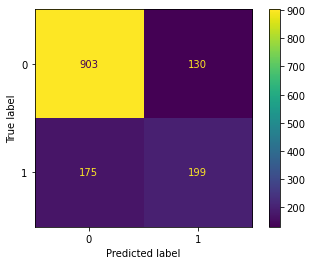

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1033
           1       0.60      0.53      0.57       374

    accuracy                           0.78      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.78      0.78      0.78      1407



In [ ]:
plot_confusion_matrix(svc, X_test, y_test)  
plt.show()
y_pred=svc.predict(X_test)
print(classification_report(y_test, y_pred))

## LogisticRegression Model 


In [ ]:
grid_values = {
     'penalty': ['l1','l2'], 
     'C': [0.001,0.01,0.1,1,10,100,1000]}
 grid = RandomizedSearchCV(LogisticRegression(), param_distributions = grid_values, cv=5)
 from sklearn import preprocessing
 X_scaled = preprocessing.scale(X_train)
 grid.fit(X_scaled,y_train)

In [ ]:
#grid.best_params_

In [ ]:
lr=LogisticRegression(C= 10**10, penalty='l2')
lr.fit(X_scaled,y_train)
print("train score",lr.score(X_scaled,y_train))
print("test score",lr.score(X_scaled_test,y_test))
print('accuracy score: ',accuracy_score(y_test, lr.predict(X_scaled_test), normalize=False)/y_test.shape[0])

train score 0.8092444444444444
test score 0.806680881307747
accuracy score:  0.806680881307747


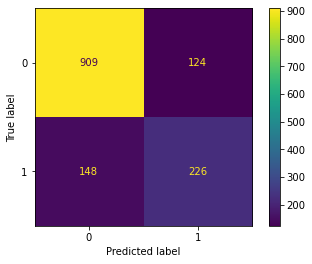

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1033
           1       0.27      1.00      0.42       374

    accuracy                           0.27      1407
   macro avg       0.13      0.50      0.21      1407
weighted avg       0.07      0.27      0.11      1407



In [ ]:
plot_confusion_matrix(lr, X_scaled_test, y_test)
plt.show()
y_pred=lr.predict(X_test)
print(classification_report(y_test, y_pred))

##  Random Forest


In [ ]:
 param_grid = {'bootstrap': [True, False],
  'max_depth': [5, 10, 20],
  'max_features': ['auto', 'sqrt'],
  'min_samples_leaf': [1, 2, 4],
  'min_samples_split': [2, 5, 10],
  'n_estimators': [100, 200, 400, 600]}

 grid = GridSearchCV(RandomForestClassifier(), param_grid = param_grid, cv=5)

 grid.fit(X_train,y_train)

In [ ]:
# grid.best_params_

In [ ]:
rf = RandomForestClassifier(bootstrap=False, max_depth = 10, max_features = 'auto' , min_samples_leaf = 1,
                            min_samples_split = 2,n_estimators = 25)

rf.fit(X_scaled,y_train)
print('train score: ',rf.score(X_scaled,y_train))
y_pred = rf.predict(X_scaled_test)
print('test score',rf.score(X_scaled_test, y_test))
print('accuracy score: ',accuracy_score(y_test, rf.predict(X_scaled_test), normalize=False)/y_test.shape[0])

train score:  0.8967111111111111
test score 0.7889125799573561
accuracy score:  0.7889125799573561


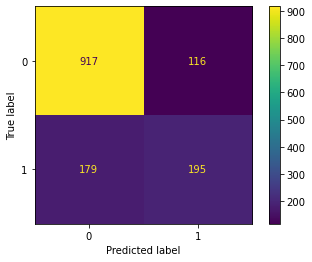

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.72      1407
weighted avg       0.78      0.79      0.78      1407



In [ ]:
plot_confusion_matrix(rf, X_scaled_test, y_test) 
plt.show()
y_pred=rf.predict(X_scaled_test)
print(classification_report(y_test, y_pred))

##  Adaboost


In [ ]:
 param_grid = {
  'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.5],
  'algorithm': ['SAMME', 'SAMME.R'],
  'n_estimators': [50, 100, 200, 400]}
 
 grid = GridSearchCV(AdaBoostClassifier(), param_grid = param_grid, cv=5)
 
 grid.fit(X_train,y_train)

In [ ]:
grid.best_params_

In [ ]:
ad = AdaBoostClassifier(algorithm = 'SAMME.R', learning_rate = 0.2, n_estimators = 70)
ad.fit(X_train,y_train)
print('train score: ',ad.score(X_train,y_train))
y_pred = ad.predict(X_test)
print('test score',ad.score(X_test, y_test))
print('accuracy score: ',accuracy_score(y_test, ad.predict(X_test), normalize=False)/y_test.shape[0])

In [ ]:
plot_confusion_matrix(ad, X_scaled_test, y_test)  
plt.show()
y_pred=rf.predict(X_scaled_test)
print(classification_report(y_test, y_pred))

# <a id='3'>6 Performances des modeles </a>

In [ ]:
def model_report(model,X_train,X_test,y_train,y_test,name) :
    model.fit(X_train,y_train)
    predictions  = model.predict(X_test)
    accuracy     = accuracy_score(y_test,predictions)
    recallscore  = recall_score(y_test,predictions)
    precision    = precision_score(y_test,predictions)
    roc_auc      = roc_auc_score(y_test,predictions)
    f1score      = f1_score(y_test,predictions) 
    kappa_metric = cohen_kappa_score(y_test,predictions)
    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score],
                       "Area_under_curve": [roc_auc],
                       "Kappa_metric"    : [kappa_metric],
                      })
    return df

#outputs for every model
model1 = model_report(ad,X_train,X_test,y_train,y_test,
                      "AdaBoostClassifier")

model3 = model_report(rf,X_train,X_test,y_train,y_test,
                      "Random Forest Classifier")

model4 = model_report(lr,X_scaled,X_scaled_test,y_train,y_test,
                      "Logistic Regression")

model2 = model_report(svc,X_train,X_test,y_train,y_test,
                      "Linear SVC")


#concat all models
model_performances = pd.concat([model1,model2,model3,
                                model4],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)

table  = ff.create_table(np.round(model_performances,4))

py.iplot(table)

In [ ]:
model_performances
def output_tracer(metric,color) :
    tracer = go.Bar(y = model_performances["Model"] ,
                    x = model_performances[metric],
                    orientation = "h",name = metric ,
                    marker = dict(line = dict(width =.7),
                                  color = color)
                   )
    return tracer

layout = go.Layout(dict(title = "Model performances",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "metric",
                                     zerolinewidth=1,
                                     ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        margin = dict(l = 250),
                        height = 780
                       )
                  )


trace1  = output_tracer("Accuracy_score","#6699FF")
trace2  = output_tracer('Recall_score',"red")
trace3  = output_tracer('Precision',"#33CC99")
trace4  = output_tracer('f1_score',"lightgrey")
trace5  = output_tracer('Kappa_metric',"#FFCC99")

data = [trace1,trace2,trace3,trace4,trace5]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

